In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (24, 10)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 18

In [2]:
with open("analysis/society-chicken.pickle", "rb") as f:
    data = pickle.load(f)

In [3]:
weight_df = pd.DataFrame(
    [
        ["train", population, lb, w]
        for (population, lb, t), weights in data["train_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ]
    + [
        ["test", population, lb, w]
        for (population, lb, t), weights in data["test_weights"].items()
        for weight in weights
        for w in np.array(weight).ravel()
        if np.isfinite(w)
    ],
    columns=["phase", "population", "lookback", "weight"],
)

weight_df

,phase,population,lookback,weight
0,train,16,1,0.910080
1,train,16,1,0.891691
2,train,16,1,0.906295
3,train,16,1,0.907681
4,train,16,1,0.906031
...,...,...,...,...
41811835,test,512,3,0.714286
41811836,test,512,3,1.000000
41811837,test,512,3,1.000000
41811838,test,512,3,1.000000


(0.0, 1.0)

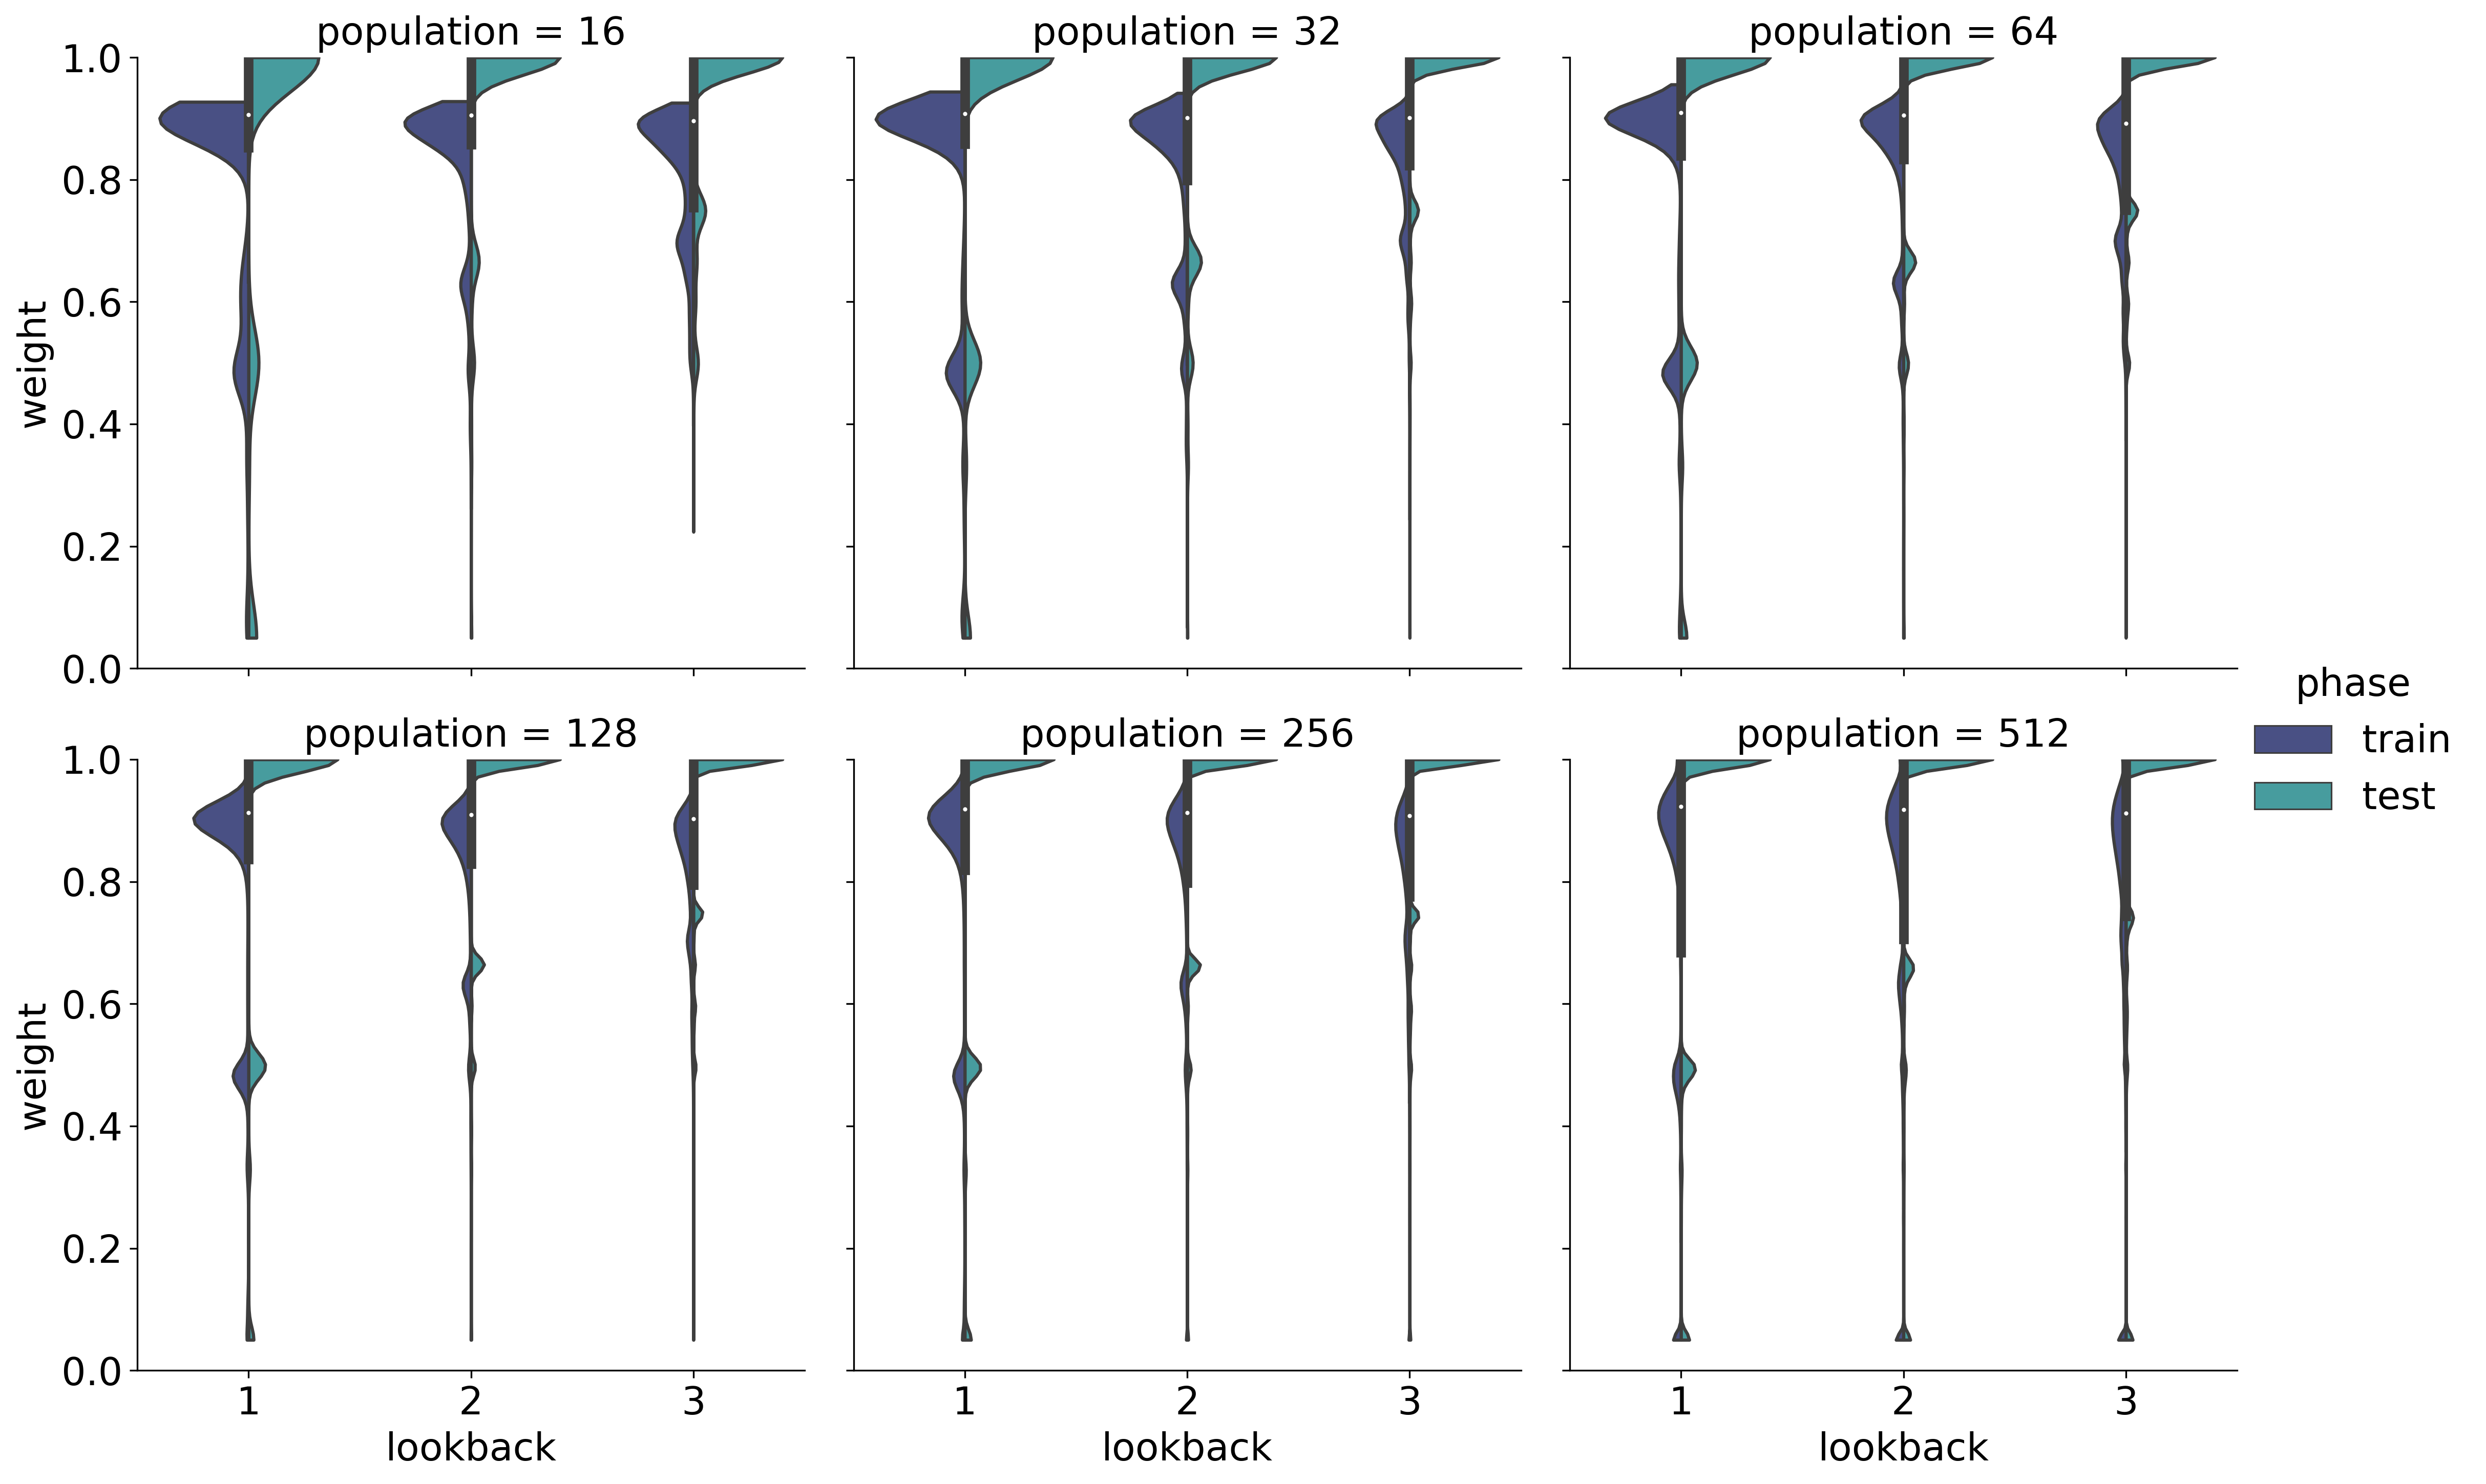

In [4]:
sns.catplot(
    data=weight_df,
    x="lookback",
    y="weight",
    hue="phase",
    col="population",
    palette="mako",
    col_wrap=3,
    kind="violin",
    cut=0,
    split=True,
)

plt.ylim(0.0, 1.0)

In [5]:
reward_df = pd.DataFrame(
    [
        ["train", population, lb, reward]
        for (population, lb, t), rewards in data["train_mean_reward"].items()
        for reward in rewards
    ]
    + [
        ["test", population, lb, reward]
        for (population, lb, t), rewards in data["test_mean_reward"].items()
        for reward in rewards
    ],
    columns=["phase", "population", "lookback", "mean_reward"],
)

reward_df

,phase,population,lookback,mean_reward
0,train,16,1,1.989613
1,train,16,1,1.985700
2,train,16,1,1.990925
3,train,16,1,1.981237
4,train,16,1,1.990925
...,...,...,...,...
715,test,512,3,1.995457
716,test,512,3,1.992327
717,test,512,3,1.993846
718,test,512,3,1.996283


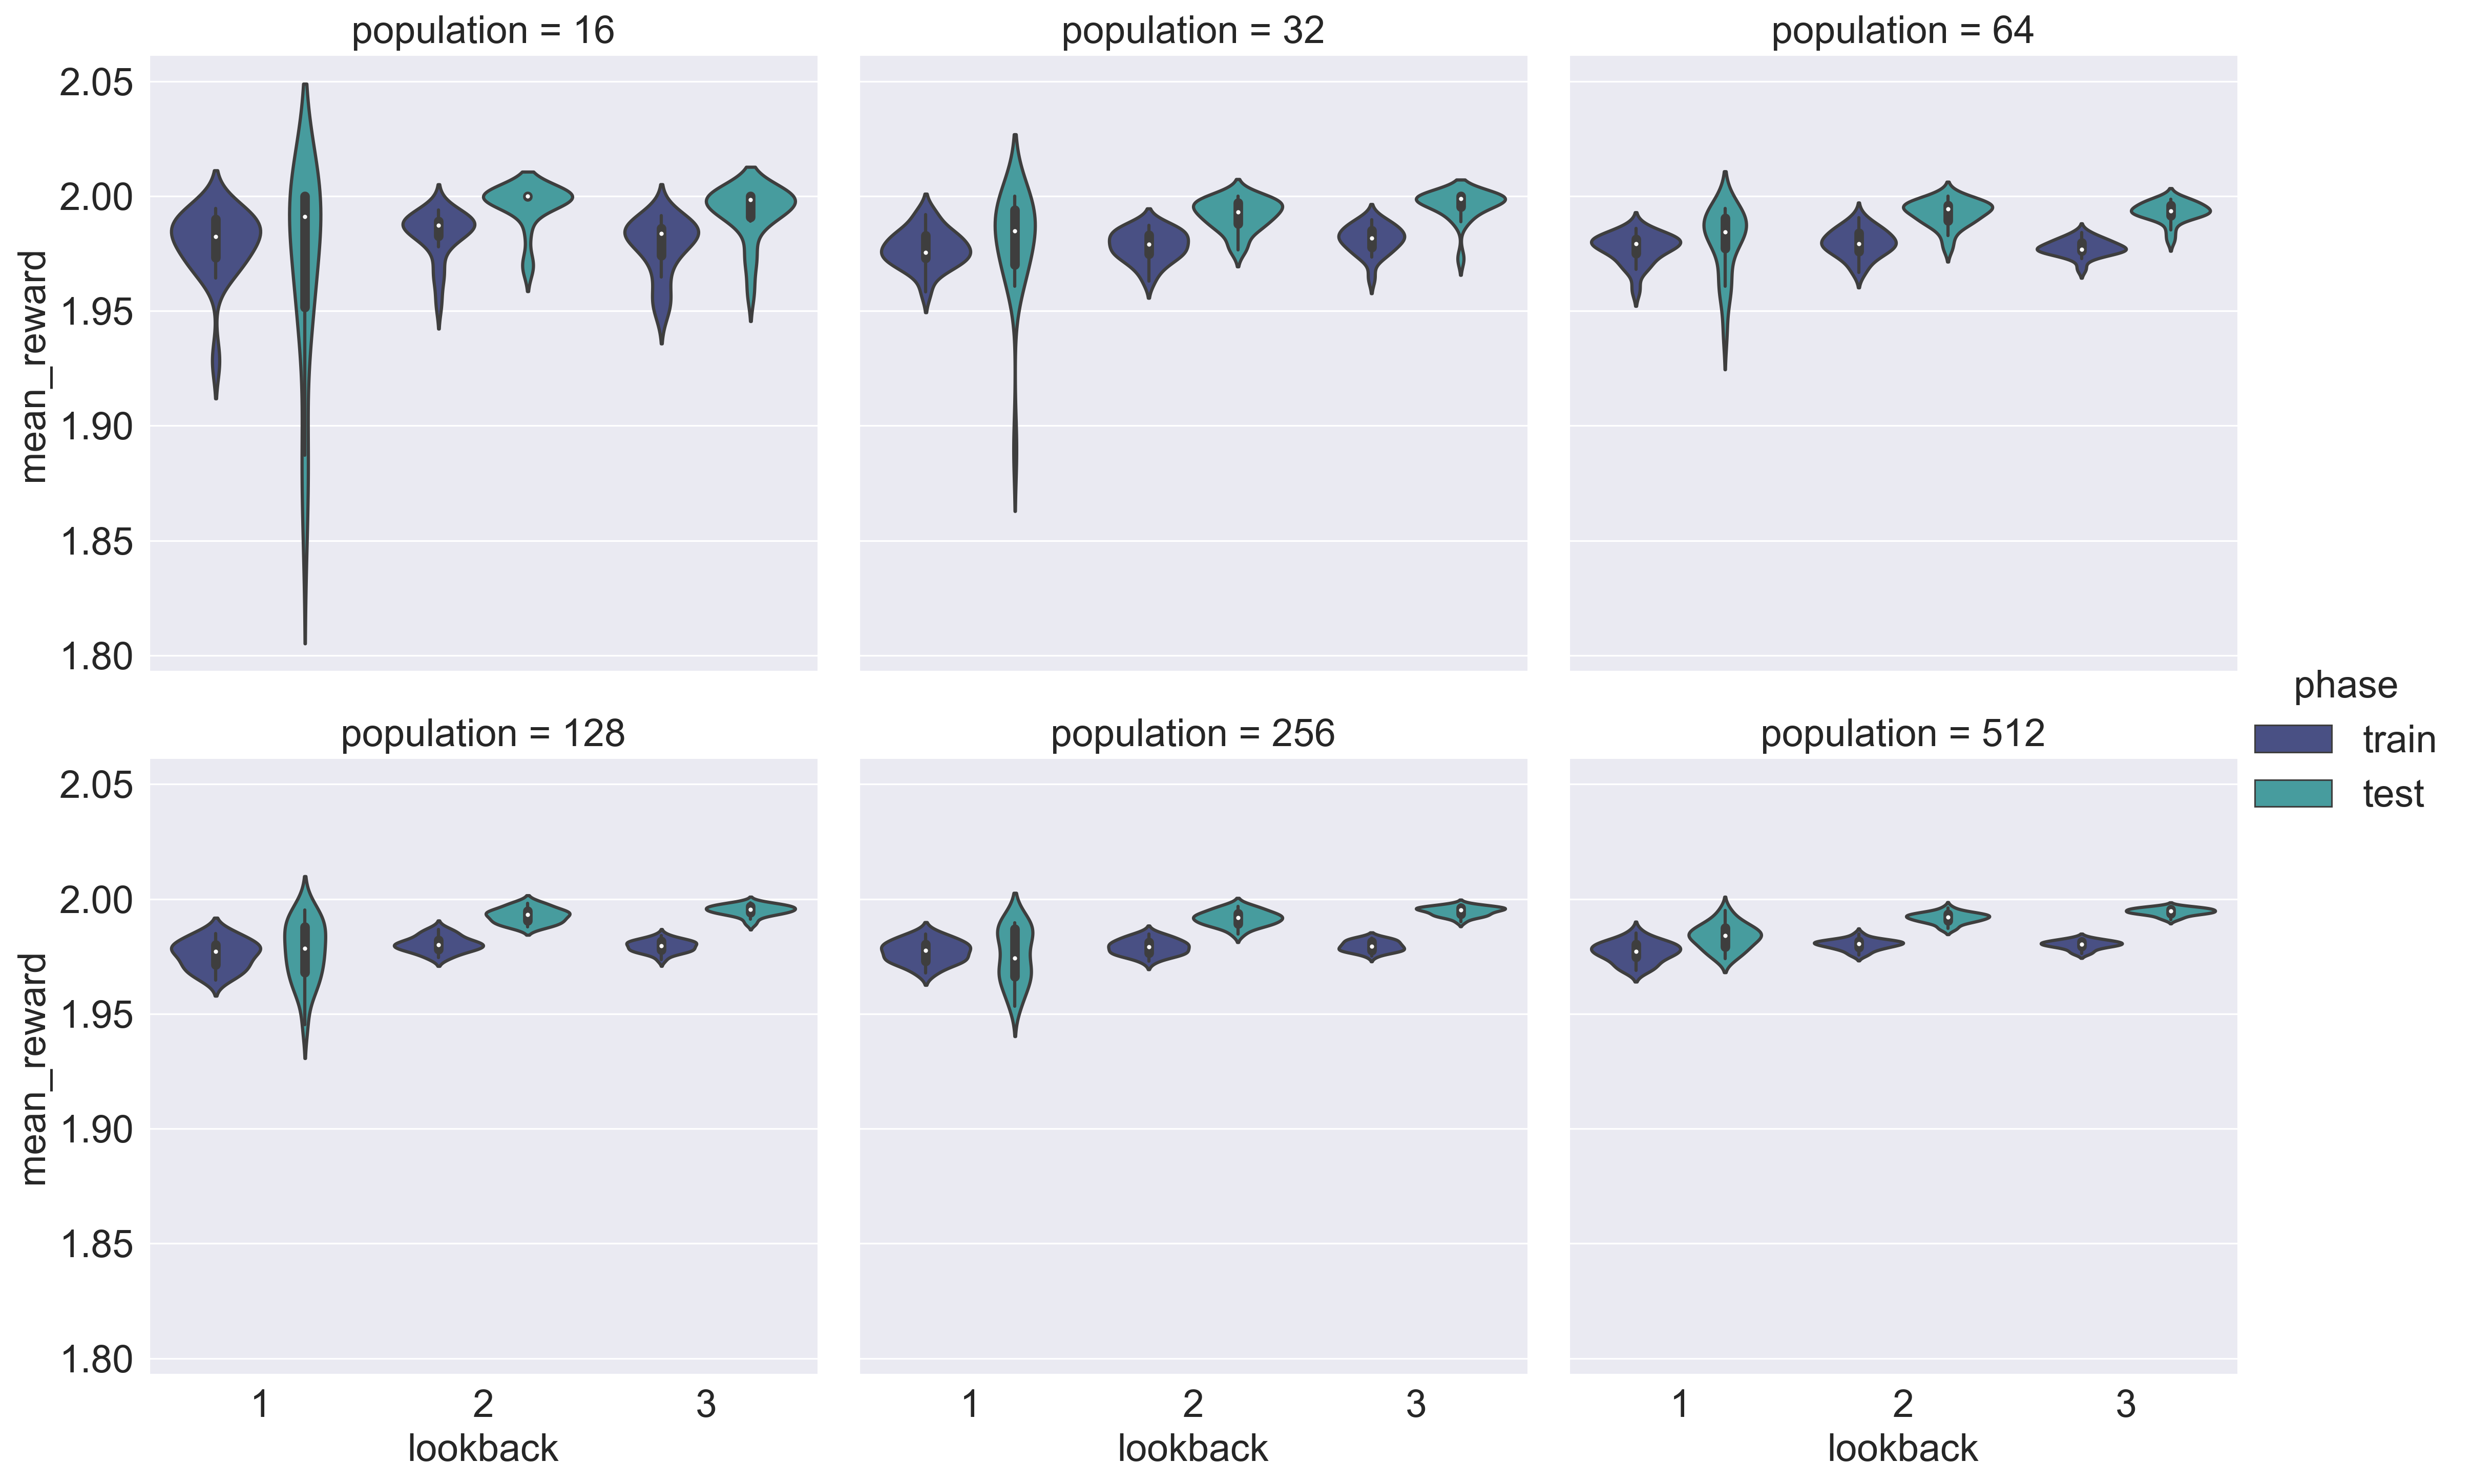

In [6]:
sns.set_style("darkgrid")

sns.catplot(
    reward_df,
    x="lookback",
    y="mean_reward",
    col="population",
    col_wrap=3,
    hue="phase",
    palette="mako",
    kind="violin",
)

In [7]:
agg_df = reward_df.groupby(["phase", "population", "lookback"]).agg(
    {"mean_reward": ["mean", "std"]}
)

agg_df

mean_reward          
                                 mean       std
phase population lookback                      
test  16         1           1.967439  0.044499
                 2           1.995832  0.009627
                 3           1.992692  0.011537
      32         1           1.979569  0.024449
                 2           1.991828  0.006685
                 3           1.996136  0.006489
      64         1           1.979960  0.014717
                 2           1.992529  0.005639
                 3           1.993127  0.004348
      128        1           1.976810  0.013383
                 2           1.992812  0.003173
                 3           1.995155  0.002299
      256        1           1.975029  0.011910
                 2           1.991666  0.003212
                 3           1.994723  0.001940
      512        1           1.983641  0.005481
                 2           1.991788  0.002265
                 3           1.994520  0.001540
train 16         1           1.979118  0.015007
                 2           1.983312  0.010211
                 3           1.977741  0.012424
      32         1           1.976993  0.008214
                 2           1.978199  0.006679
                 3           1.980971  0.006202
      64         1           1.977206  0.006441
                 2           1.979493  0.005989
                 3           1.977445  0.003597
      128        1           1.975840  0.006165
                 2           1.980386  0.003390
                 3           1.979445  0.002567
      256        1           1.976954  0.004742
                 2           1.979118  0.003242
                 3           1.979546  0.002247
      512        1           1.976964  0.004437
                 2           1.980215  0.002205
                 3           1.980115  0.001832

In [8]:
pivoted_df = (
    agg_df.reset_index()
    .pivot(["phase", "population"], columns="lookback")
    .reset_index()
)

pivoted_df

C:\Users\jerem\AppData\Local\Temp/ipykernel_3044/913573291.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivoted_df = agg_df.reset_index().pivot(["phase", "population"], columns="lookback").reset_index()


phase population mean_reward                                \
                                  mean                           std   
lookback                             1         2         3         1   
0          test         16    1.967439  1.995832  1.992692  0.044499   
1          test         32    1.979569  1.991828  1.996136  0.024449   
2          test         64    1.979960  1.992529  1.993127  0.014717   
3          test        128    1.976810  1.992812  1.995155  0.013383   
4          test        256    1.975029  1.991666  1.994723  0.011910   
5          test        512    1.983641  1.991788  1.994520  0.005481   
6         train         16    1.979118  1.983312  1.977741  0.015007   
7         train         32    1.976993  1.978199  1.980971  0.008214   
8         train         64    1.977206  1.979493  1.977445  0.006441   
9         train        128    1.975840  1.980386  1.979445  0.006165   
10        train        256    1.976954  1.979118  1.979546  0.004742   
11        train        512    1.976964  1.980215  1.980115  0.004437   

                              
                              
lookback         2         3  
0         0.009627  0.011537  
1         0.006685  0.006489  
2         0.005639  0.004348  
3         0.003173  0.002299  
4         0.003212  0.001940  
5         0.002265  0.001540  
6         0.010211  0.012424  
7         0.006679  0.006202  
8         0.005989  0.003597  
9         0.003390  0.002567  
10        0.003242  0.002247  
11        0.002205  0.001832

In [9]:
for _, row in pivoted_df[pivoted_df["phase"] == "train"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$1.979 \pm 0.015$	&	$1.983 \pm 0.010$	&	$1.978 \pm 0.012$ \\
32	&	$1.977 \pm 0.008$	&	$1.978 \pm 0.007$	&	$1.981 \pm 0.006$ \\
64	&	$1.977 \pm 0.006$	&	$1.979 \pm 0.006$	&	$1.977 \pm 0.004$ \\
128	&	$1.976 \pm 0.006$	&	$1.980 \pm 0.003$	&	$1.979 \pm 0.003$ \\
256	&	$1.977 \pm 0.005$	&	$1.979 \pm 0.003$	&	$1.980 \pm 0.002$ \\
512	&	$1.977 \pm 0.004$	&	$1.980 \pm 0.002$	&	$1.980 \pm 0.002$ \\


In [10]:
for _, row in pivoted_df[pivoted_df["phase"] == "test"].iterrows():
    print(
        row["population"][0],
        *(
            f"${mean:.3f} \pm {std:.3f}$"
            for mean, std in zip(
                row["mean_reward"]["mean"],
                row["mean_reward"]["std"],
            )
        ),
        sep="\t&\t",
        end=" \\\\\n",
    )

16	&	$1.967 \pm 0.044$	&	$1.996 \pm 0.010$	&	$1.993 \pm 0.012$ \\
32	&	$1.980 \pm 0.024$	&	$1.992 \pm 0.007$	&	$1.996 \pm 0.006$ \\
64	&	$1.980 \pm 0.015$	&	$1.993 \pm 0.006$	&	$1.993 \pm 0.004$ \\
128	&	$1.977 \pm 0.013$	&	$1.993 \pm 0.003$	&	$1.995 \pm 0.002$ \\
256	&	$1.975 \pm 0.012$	&	$1.992 \pm 0.003$	&	$1.995 \pm 0.002$ \\
512	&	$1.984 \pm 0.005$	&	$1.992 \pm 0.002$	&	$1.995 \pm 0.002$ \\
